In [92]:
TASK: 2

In [93]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('fox.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

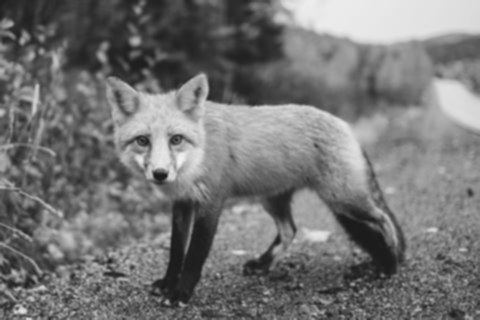

In [94]:
gaussian_blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)
cv2.imwrite('gaussian_blurred.jpg', gaussian_blurred)
cv2_imshow(gaussian_blurred)

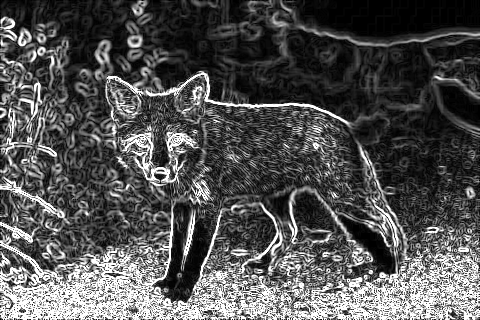

In [95]:
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)
cv2.imwrite('sobel_edge.jpg', sobel_edge)
cv2_imshow(sobel_edge)


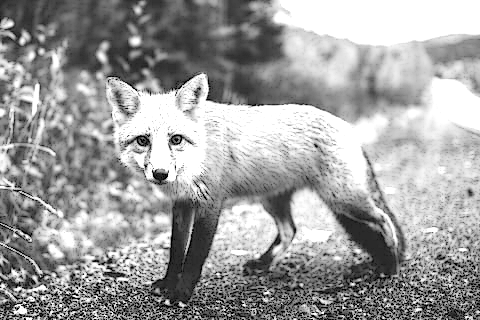

In [96]:
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
laplacian_abs = cv2.convertScaleAbs(laplacian)
sharpened = cv2.addWeighted(gray_image, 1.5, laplacian_abs, -0.5, 0)
cv2.imwrite('sharpened_image.jpg', sharpened)
cv2_imshow(sharpened)

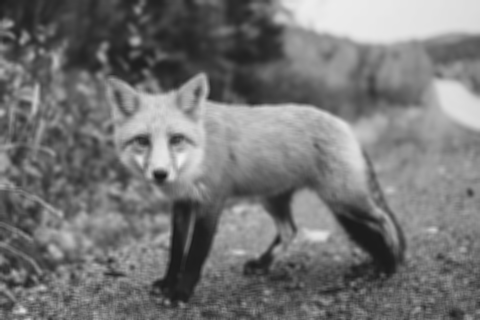

In [97]:
mean_filtered = cv2.blur(gray_image, (5, 5))
cv2.imwrite('mean_filtered.jpg', mean_filtered)
cv2_imshow(mean_filtered)

In [98]:
TASK: 4

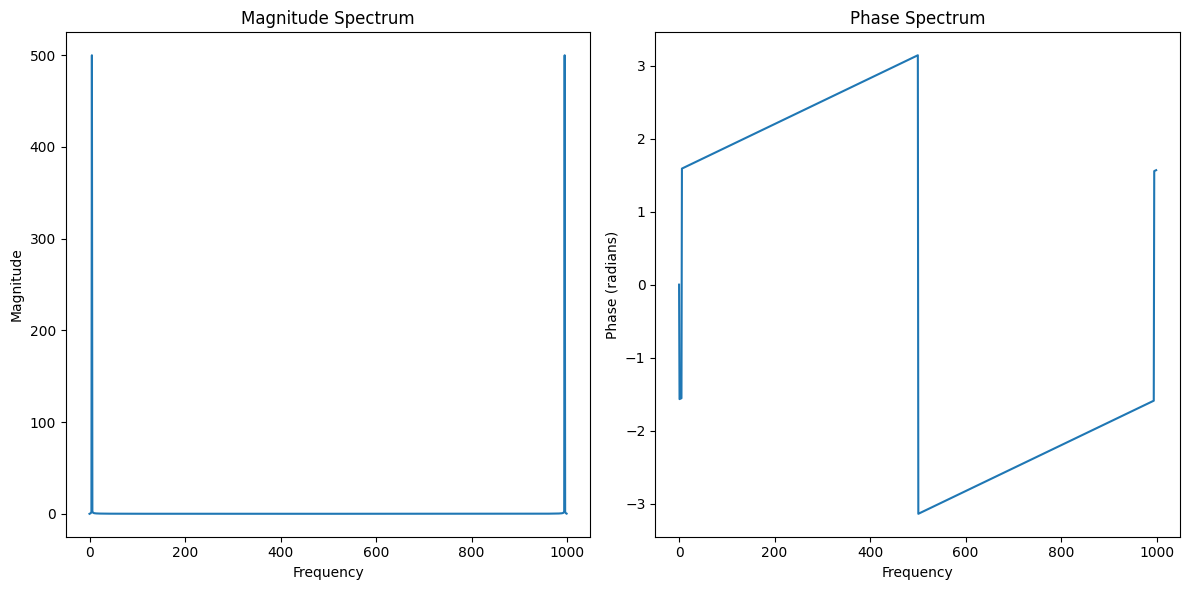

In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

signal = np.sin(2 * np.pi * 5 * np.linspace(0, 1, 1000))

fft_result = np.fft.fft(signal)

magnitude_spectrum = np.abs(fft_result)
phase_spectrum = np.angle(fft_result)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(magnitude_spectrum)
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.subplot(122)
plt.plot(phase_spectrum)
plt.title('Phase Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Phase (radians)')

plt.tight_layout()
plt.show()


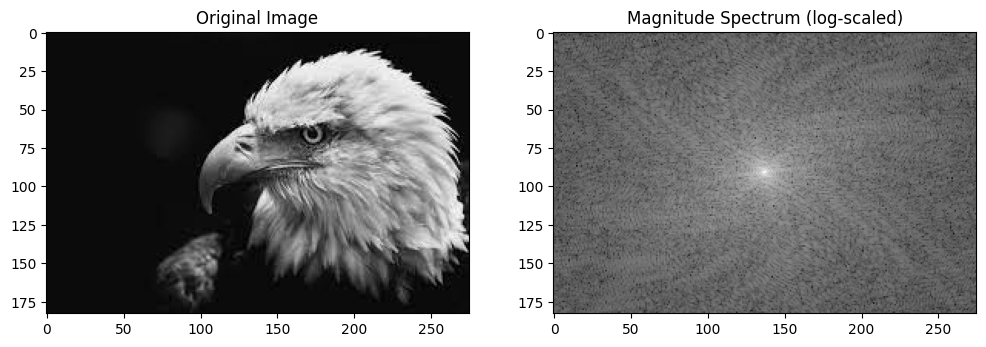

In [100]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('eagle.jpg', cv2.IMREAD_GRAYSCALE)

fourier_transform = np.fft.fft2(image)

fourier_transform_shifted = np.fft.fftshift(fourier_transform)

magnitude_spectrum = np.log(np.abs(fourier_transform_shifted) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (log-scaled)')

plt.show()


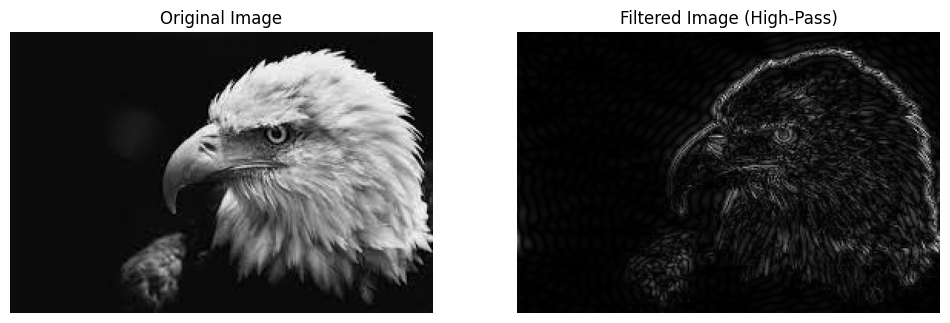

In [101]:
f_transform = np.fft.fft2(image)

f_transform_shifted = np.fft.fftshift(f_transform)

def high_pass_filter(size, cutoff):
    filter_matrix = np.ones(size, dtype=np.float64)
    center = tuple(map(lambda x: (x - 1) / 2, size))
    for x in range(size[0]):
        for y in range(size[1]):
            dist = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)
            if dist < cutoff:
                filter_matrix[x, y] = 0
    return filter_matrix

cutoff_frequency = 20
filter_matrix = high_pass_filter(image.shape, cutoff_frequency)
filtered_f_transform = f_transform_shifted * filter_matrix

filtered_f_transform_unshifted = np.fft.ifftshift(filtered_f_transform)

filtered_image = np.abs(np.fft.ifft2(filtered_f_transform_unshifted))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (High-Pass)')
plt.axis('off')

plt.show()


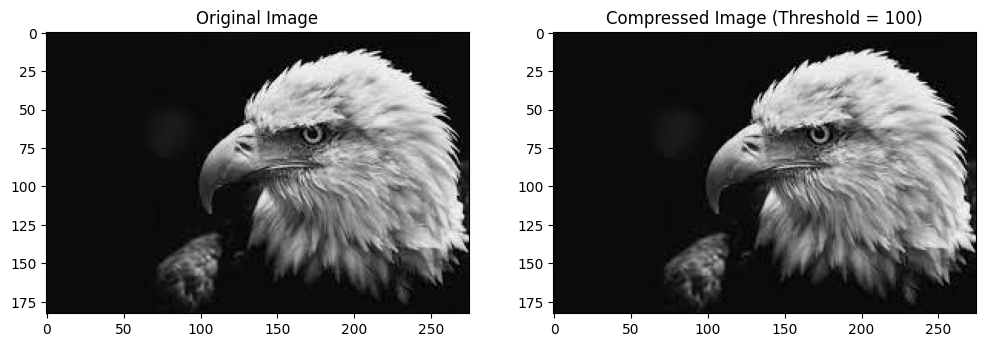

In [102]:
fourier_transform = np.fft.fft2(image)

threshold = 100
filtered_fourier_transform = fourier_transform.copy()
filtered_fourier_transform[abs(filtered_fourier_transform) < threshold] = 0

compressed_image = np.abs(np.fft.ifft2(filtered_fourier_transform))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image (Threshold = {})'.format(threshold))

plt.show()
